# Predicting Delays Based on Flight Data

### Import Statements

In [2]:
# make sure to use the same kernel as the one you use for class
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier


### Import Data

In [3]:
data = pd.read_csv('Airlines.csv')

print(data.head()) #check if data imported correctly

   id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
0   1      CO     269         SFO       IAH          3    15     205      1
1   2      US    1558         PHX       CLT          3    15     222      1
2   3      AA    2400         LAX       DFW          3    20     165      1
3   4      AA    2466         SFO       DFW          3    20     195      1
4   5      AS     108         ANC       SEA          3    30     202      0


## Summary Statistics

In [4]:
# Proportion of Flights by Day
mon = (data['DayOfWeek'].value_counts()[1]) / len(data)
tues = (data['DayOfWeek'].value_counts()[2]) / len(data)
wed = (data['DayOfWeek'].value_counts()[3]) / len(data)
thurs = (data['DayOfWeek'].value_counts()[4]) / len(data)
fri = (data['DayOfWeek'].value_counts()[5]) / len(data)
sat = (data['DayOfWeek'].value_counts()[6]) / len(data)
sun = (data['DayOfWeek'].value_counts()[7]) / len(data)

#Proportion of delays/ total : Mong
prop_delays = data[data['Delay'] == 1].shape[0] / data.shape[0]
print('Proportion of Delays/Total:', prop_delays)


#Proportion of delays per airline

Southwest = len(data[(data['Airline'] == 'WN') & (data['Delay'] == 1)]) / len(data)
Delta = len(data[(data['Airline'] == 'DL') & (data['Delay'] == 1)]) / len(data)
SkyWest = len(data[(data['Airline'] == 'OO') & (data['Delay'] == 1)]) / len(data)
American = len(data[(data['Airline'] == 'AA') & (data['Delay'] == 1)]) / len(data)
Envoy = len(data[(data['Airline'] == 'MQ') & (data['Delay'] == 1)]) / len(data)
US = len(data[(data['Airline'] == 'US') & (data['Delay'] == 1)]) / len(data)
JetSuite = len(data[(data['Airline'] == 'XE') & (data['Delay'] == 1)]) / len(data)
ExpressJet = len(data[(data['Airline'] == 'EV') & (data['Delay'] == 1)]) / len(data)
United = len(data[(data['Airline'] == 'UA') & (data['Delay'] == 1)]) / len(data)
Continental = len(data[(data['Airline'] == 'CO') & (data['Delay'] == 1)]) / len(data)
AirTran =  len(data[(data['Airline'] == 'FL') & (data['Delay'] == 1)]) / len(data)
Endeavor = len(data[(data['Airline'] == '9E') & (data['Delay'] == 1)]) / len(data)
JetBlue = len(data[(data['Airline'] == 'B6') & (data['Delay'] == 1)]) / len(data)
Mesa = len(data[(data['Airline'] == 'YV') & (data['Delay'] == 1)]) / len(data)
PSA =  len(data[(data['Airline'] == 'OH') & (data['Delay'] == 1)]) / len(data)
Alaska =  len(data[(data['Airline'] == 'AS') & (data['Delay'] == 1)]) / len(data)



Proportion of Delays/Total: 0.4454422923970537


# Plots / Figures

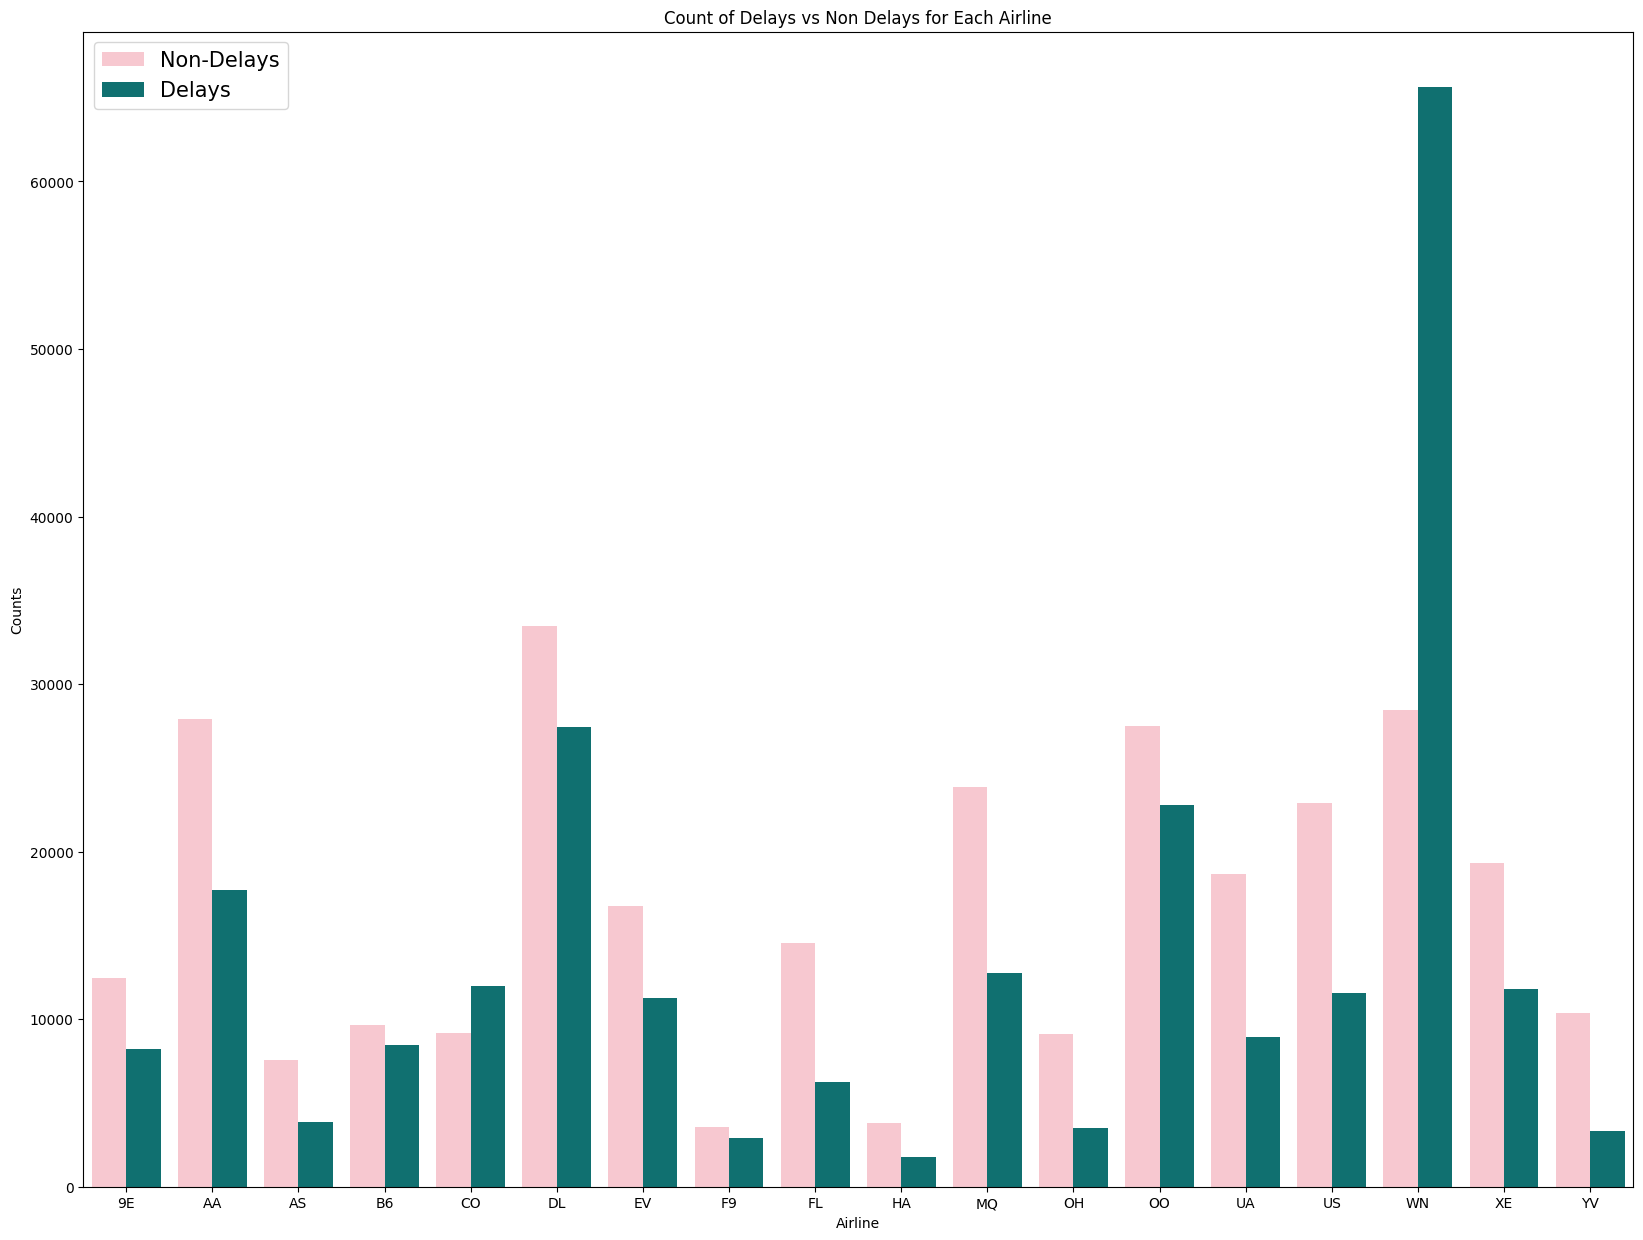

In [5]:
#Histogram of Delays vs Non Delays for each Airline : Mong

delay_counts = data.groupby(['Airline', 'Delay']).size().reset_index(name='Delays')

plt.figure(figsize=(20, 15))
sns.barplot(x='Airline', y='Delays', hue='Delay', data=delay_counts, palette = {0: 'pink', 1: 'teal'})
plt.title("Count of Delays vs Non Delays for Each Airline")
plt.xlabel("Airline")
plt.ylabel("Counts")
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles = handles, labels=["Non-Delays", "Delays"],loc='upper left', fontsize=15)
plt.show()

# Models

### Logistic Regression : Mong

In [ ]:
X = data[['Airline', 'DayOfWeek', 'Time', 'Length']]
y = data['Delay']

X = pd.get_dummies(X, columns=['Airline'], drop_first=True) #prevents multicolinearity 

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# Scale data for better peformance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create, train, fit model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6338051669957452
Confusion Matrix:
 [[47160 12847]
 [26657 21213]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.79      0.70     60007
           1       0.62      0.44      0.52     47870

    accuracy                           0.63    107877
   macro avg       0.63      0.61      0.61    107877
weighted avg       0.63      0.63      0.62    107877



### Decision Tree: Nada

In [ ]:
#Creating Decision Tree Object
clf = DecisionTreeClassifier()
#Fit data on model
clf.fit(X_train, y_train)

#Predict delay on test data
y_pred_tree = clf.predict(X_test)

# Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

Accuracy: 0.6105379274544157
Confusion Matrix:
 [[42725 17282]
 [24732 23138]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.71      0.67     60007
           1       0.57      0.48      0.52     47870

    accuracy                           0.61    107877
   macro avg       0.60      0.60      0.60    107877
weighted avg       0.61      0.61      0.61    107877



### Knn Model: Vivian

In [7]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the data
label_encoder = LabelEncoder()
data["Airline"] = label_encoder.fit_transform(data["Airline"])
data["Flight"] = label_encoder.fit_transform(data["Flight"])
data["AirportFrom"] = label_encoder.fit_transform(data["AirportFrom"])
data["AirportTo"] = label_encoder.fit_transform(data["AirportTo"])

# Define features and target variable
X = data[
    ["id", 
     "Airline",
     "Flight", 
     "AirportFrom", 
     "AirportTo", 
     "DayOfWeek",
     "Time", 
     "Length"
    ]
]

y = data["Delay"]

print("Feature and target variables defined.")
print("X shape:", X.shape)
print("y shape:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")

# Initialize the KNN model with knn=5000
knn_500 = KNeighborsClassifier(n_neighbors=500)
knn_500.fit(X_train, y_train)
print("KNN model trained.")

# Make predictions on the training and testing sets
y_train_pred_knn_500 = knn_500.predict(X_train)
y_test_pred_knn_500 = knn_500.predict(X_test)

# Evaluate the model on the training set
print("Training Set Results (kNN=500 -> 539383 rows of data^.5) ")
print(metrics.classification_report(y_train, y_train_pred_knn_500))
print("Confusion Matrix (Training):\n", metrics.confusion_matrix(y_train, y_train_pred_knn_500))

# Evaluate the model on the testing set
print("\nTesting Set Results (kNN=500")
print(metrics.classification_report(y_test, y_test_pred_knn_500))
print("Confusion Matrix (Testing):\n", metrics.confusion_matrix(y_test, y_test_pred_knn_500))

Feature and target variables defined.
X shape: (539383, 8)
y shape: (539383,)
Data split into training and testing sets.
KNN model trained.
Training Set Results (kNN=500 -> 539383 rows of data^.5) 
              precision    recall  f1-score   support

           0       0.64      0.72      0.68    239240
           1       0.59      0.49      0.54    192266

    accuracy                           0.62    431506
   macro avg       0.61      0.61      0.61    431506
weighted avg       0.62      0.62      0.62    431506

Confusion Matrix (Training):
 [[173042  66198]
 [ 97274  94992]]

Testing Set Results (kNN=500
              precision    recall  f1-score   support

           0       0.64      0.72      0.68     59879
           1       0.59      0.49      0.54     47998

    accuracy                           0.62    107877
   macro avg       0.61      0.61      0.61    107877
weighted avg       0.62      0.62      0.61    107877

Confusion Matrix (Testing):
 [[43173 16706]
 [24341 2

## Evaluation Metrics: Vivian

Accuracy

Precision 

Recall



In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=500)
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test)

# Calculate Accuracy, Precision, and Recall
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.6195
Precision: 0.5861
Recall: 0.4929
